Alfian Dwi Kurnia 



1. Apa itu Data Mining?
Data Mining merupakan proses dalam pengumpulan dan pengolahan data yang bertujuan untuk mengekstrak informasi penting pada data yang kecil maupun besar.

2. Sebutkan kelebihan dan kekurangan Naive Bayes Classifier?
*   Kelebihan
*   - Cepat dan efisiensi ruang
*   - Menangani kuantitatif dan data diskrit
*   - Kokoh terhadap atribut yang tidak relevan
*   - Hanya memerlukan sejumlah kecil data pelatihan untuk mengestimasi parameter yang dibutuhkan untuk klasifikasi.



*   Kekurangan
*   - Mengasumsikan variabel bebas
*   - Tidak berlaku jika probabilitas adalah nol, apabila nol maka probabilitas prediksi akan bernilai nol









3. Dari dataset di bawah ini, putuskan apakah kita harus bermain atau tidak pada
hari tertentu sesuai dengan kondisi cuaca. Gunakan teorema bayes

LATIHAN

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_iris.info()
df_iris.drop("Id", axis=1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


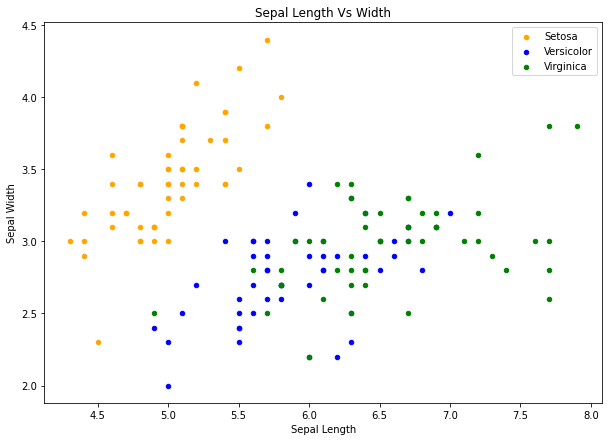

In [4]:
# Visualisasi Data
fig = df_iris[df_iris.Species == 'Iris-setosa'].plot(kind='scatter',
x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
df_iris[df_iris.Species == 'Iris-versicolor'].plot(kind='scatter',
x='SepalLengthCm', y='SepalWidthCm', color='blue',
label='Versicolor', ax=fig)
df_iris[df_iris.Species == 'Iris-virginica'].plot(kind='scatter',
x='SepalLengthCm', y='SepalWidthCm', color='green',
label='Virginica', ax=fig)
 
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')
 
fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

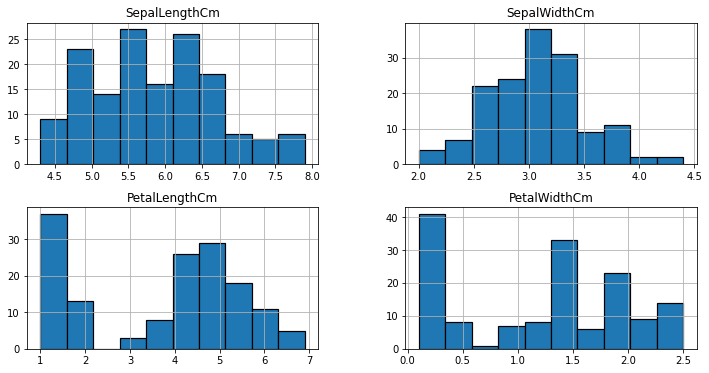

In [5]:
df_iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

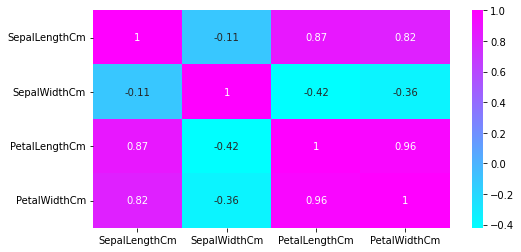

In [6]:
# Cek Korelasi Fitur
plt.figure(figsize=(8,4))
sns.heatmap(df_iris.corr(), annot=True, cmap='cool') 
plt.show()

In [7]:
# Modeling data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_iris, test_size=0.25) 
print(train.shape)
print(test.shape)


(112, 5)
(38, 5)


In [9]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # 0utput of the training data
 
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # Taking test data feature
test_y = test.Species # Output value of the test data

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

Gausian Naive Bayes

In [12]:
# melakukan fitting naive bayes classification untuk training set dengan linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_X, train_y)

GaussianNB()

In [13]:
# memeriksa Hasil Klasifikasi
y_pred = nvclassifier.predict(test_X)
print(y_pred)
 
# periksa actual dan predicted
y_compare = np.vstack((test_y,y_pred)).T
# hasil actual berada di kiri dan predicted di sebelah kanan
# menunjukkan 5 baris pertama
y_compare[:5,:]

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica']


array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica']], dtype=object)

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
print(cm)
 
# Classification report and accuracy
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_y, y_pred))
print("Accuracy :",accuracy_score(test_y, y_pred))

[[ 8  0  0]
 [ 0 13  2]
 [ 0  1 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.92        38
      macro avg       0.93      0.93      0.93        38
   weighted avg       0.92      0.92      0.92        38

Accuracy : 0.9210526315789473
